# 数据预处理

In [1]:
import keras
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,Conv1D,Flatten,GRU
from keras.callbacks import TensorBoard
from keras.utils import plot_model
from keras.callbacks import *
from keras import regularizers
import matplotlib.pyplot as plt
from keras.models import load_model
import time
#从.dat格式文件中读取数据和标签，打乱并分割数据集

data = np.zeros((1200,1,256),dtype=np.float64)
i = 0
for line in open("/Users/yuchen/Desktop/HRR/hrr.dat",'r'):
    data[i] = line.split() 
    data[i] = np.array(data[i])
    data[i] = np.expand_dims(data[i],axis=0)
    i += 1

print (data.shape)
    

label = [1 for i in range (300)] + [2 for i in range(300)] + [3 for i in range(300)] + [4 for i in range(300)]
label=pd.get_dummies(label)
label = np.array(label)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=2)



y_train_index = [np.where(r==1)[0][0] for r in y_train]
train_samples = [y_train_index.count(0),y_train_index.count(1),y_train_index.count(2),y_train_index.count(3)]
coord_x = np.arange(4)
y_test_index  = [np.where(r==1)[0][0] for r in y_test]





def preformance_analyze(model,y_test_index,X_test):
    #评估模型在测试集上分类的准确率
    
    start_time = time.time()
    model_prob = model.predict(X_test)  #输出每个类的概率
    model_pred_index = [np.argmax(i) for i in model_prob]   #输出最大概率的class


    end_time = time.time()
    '''
    model_prob look like this   [[0 0 0 1]
                             [0 1 0 0]
                             [1 0 0 0]]
    '''
    correct_predict = 0
    for i,j in zip(model_pred_index,y_test_index):
        if i == j:correct_predict += 1

    test_acc = correct_predict/len(y_test_index)
    print("accuracy on %d testing samples is: %.2f ,using time:%.3f"%(len(y_test_index), test_acc*100,\
                                                                      end_time-start_time))

    error_num = [0,0,0,0] 
    #calculate the mistake sample's num for each class
    
    error_class = []
    for i,j in zip(model_pred_index,y_test_index):
        if i != j:
            error_num[j] += 1
            error_class.append((j,i))

    #print (error_num)    
    for i in range(len(error_num)):
        class_accuracy = (y_test_index.count(i)-error_num[i])/y_test_index.count(i)*100
        print( "accuracy of Class %s is :%.2f " %(i, class_accuracy))
        
    print("mistake class list",sorted(error_class))
    return model_prob



# def merge_model_preformance_analyze(model1, model2, y_test_index):
    
#     start_time = time.time()
#     model_prob1 = np.array(model1.predict(X_test))  #输出每个类的概率
#     model_prob2 = np.array(model2.predict(X_test))
#     average_prob = (0.4*model_prob1+0.6*model_prob2)
#     model_pred_index = [np.argmax(i) for i in average_prob]   #输出最大概率的class


#     end_time = time.time()
#     '''
#     model_prob look like this   [[0 0 0 1]
#                              [0 1 0 0]
#                              [1 0 0 0]]
#     '''
#     correct_predict = 0
#     for i,j in zip(model_pred_index,y_test_index):
#         if i == j:correct_predict += 1

#     test_acc = correct_predict/len(y_test_index)
#     print("accuracy on %d testing samples is: %.2f ,using time:%.3f"%(len(y_test_index), test_acc*100,\
#                                                                       end_time-start_time))

#     error_num = [0,0,0,0] #calculate the mistake sample's num for each class
#     for i,j in zip(model_pred_index,y_test_index):
#         if i != j:
#             error_num[j] += 1

#     #print (error_num)    
#     for i in range(len(error_num)):
#         class_accuracy = (y_test_index.count(i)-error_num[i])/y_test_index.count(i)*100
#         print( "accuracy of Class %s is :%.2f " %(i, class_accuracy))
#     return average_prob



C:\Users\yuchen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(1200, 1, 256)


# 单项GRU

In [2]:
def single_model_1():
    model = Sequential()
    model.add(GRU(64,input_shape =(1,256),
                  recurrent_dropout= 0.2, 
                  name = 'gru1'))
    model.add(Dropout(0.2))

    model.add(Dense(4, activation='sigmoid',use_bias=True,name = 'output'))
    model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    return model


def single_model_2():
    model = Sequential()
    model.add(GRU(64,input_shape =(1,256),
                  recurrent_dropout= 0.2, 
                  name = 'gru1'))
    model.add(Dropout(0.2))

    model.add(Dense(4, activation='sigmoid',use_bias=True,name = 'output'))
    model.compile(loss='categorical_crossentropy',optimizer='Adagrad',metrics=['accuracy'])
    return model


def single_model_3():
    model = Sequential()
    model.add(GRU(128,input_shape =(1,256),
                  recurrent_dropout= 0.2, 
                  name = 'gru1'))
    model.add(Dropout(0.2))

    model.add(Dense(4, activation='sigmoid',use_bias=True,name = 'output'))
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    return model
    
single_1 = single_model_1()
single_2 = single_model_2()
single_3 = single_model_3()

single_1.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru1 (GRU)                   (None, 64)                61632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
output (Dense)               (None, 4)                 260       
Total params: 61,892
Trainable params: 61,892
Non-trainable params: 0
_________________________________________________________________


## optimizer 对GRU-1收敛速度的影响

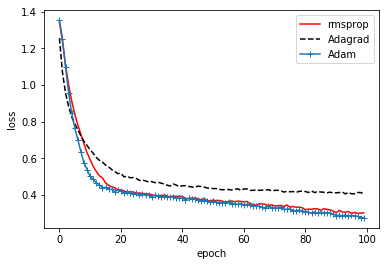

In [6]:
import matplotlib.pyplot as plt
plt.plot(single_history1.history['loss'],'r-')
plt.plot(single_history2.history['loss'],'k--')
plt.plot(single_history3.history['loss'],'+-')
#plt.title('model loss on training data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['rmsprop','Adagrad','Adam'], loc=0)
plt.show()

# 双层GRU

In [3]:
def double_gru_model1():
    model = Sequential()
    model.add(GRU(32,input_shape =(1,256),return_sequences=True, 
                  recurrent_dropout= 0.3, 
                  name = 'gru1'))
    #model.add(Dropout(0.2))
    model.add(GRU(32, dropout=0.1,
                  recurrent_dropout= 0.3,
                  name = 'gru2'))
    model.add(Dense(4, activation='sigmoid',use_bias=True,name = 'output'))
    model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    return model


def double_gru_model2():
    model = Sequential()
    model.add(GRU(32,input_shape =(1,256),return_sequences=True, 
                  recurrent_dropout= 0.3, 
                  name = 'gru1'))
    #model.add(Dropout(0.2))
    model.add(GRU(32, dropout=0.1,
                  recurrent_dropout= 0.3,
                  name = 'gru2'))
    model.add(Dense(4, activation='sigmoid',use_bias=True,name = 'output'))
    model.compile(loss='categorical_crossentropy',optimizer='Adagrad',metrics=['accuracy'])
    return model

def double_gru_model3():
    model = Sequential()
    model.add(GRU(32,input_shape =(1,256),return_sequences=True, 
                  recurrent_dropout= 0.3, 
                  name = 'gru1'))
    #model.add(Dropout(0.2))
    model.add(GRU(32, dropout=0.1,
                  recurrent_dropout= 0.3,
                  name = 'gru2'))
    model.add(Dense(4, activation='sigmoid',use_bias=True,name = 'output'))
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    return model


double_1 = double_gru_model1()
double_2 = double_gru_model2()
double_3 = double_gru_model3()
double_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru1 (GRU)                   (None, 1, 32)             27744     
_________________________________________________________________
gru2 (GRU)                   (None, 32)                6240      
_________________________________________________________________
output (Dense)               (None, 4)                 132       
Total params: 34,116
Trainable params: 34,116
Non-trainable params: 0
_________________________________________________________________


In [25]:
double_history1 = double_1.fit(X_train, y_train,batch_size=16,epochs=100)
double_history2 = double_2.fit(X_train, y_train,batch_size=16,epochs=100)
double_history3 = double_3.fit(X_train, y_train,batch_size=16,epochs=100)

Epoch 1/100
1080/1080 [==============================] - 5s 5ms/step - loss: 1.3609 - acc: 0.5028
Epoch 2/100
1080/1080 [==============================] - 0s 383us/step - loss: 1.2418 - acc: 0.5093
Epoch 3/100
1080/1080 [==============================] - 0s 388us/step - loss: 1.0784 - acc: 0.5056
Epoch 4/100
1080/1080 [==============================] - 0s 390us/step - loss: 0.9785 - acc: 0.5056
Epoch 5/100
1080/1080 [==============================] - 0s 387us/step - loss: 0.9089 - acc: 0.5056
Epoch 6/100
1080/1080 [==============================] - 0s 382us/step - loss: 0.8518 - acc: 0.5583
Epoch 7/100
1080/1080 [==============================] - 0s 385us/step - loss: 0.7915 - acc: 0.6981
Epoch 8/100
1080/1080 [==============================] - 0s 395us/step - loss: 0.7195 - acc: 0.7685
Epoch 9/100
1080/1080 [==============================] - 0s 405us/step - loss: 0.6397 - acc: 0.7926
Epoch 10/100
1080/1080 [==============================] - 0s 380us/step - loss: 0.5659 - acc: 0.8167
E

1080/1080 [==============================] - 0s 427us/step - loss: 0.3894 - acc: 0.8343
Epoch 64/100
1080/1080 [==============================] - 0s 431us/step - loss: 0.3909 - acc: 0.8324
Epoch 65/100
1080/1080 [==============================] - 0s 423us/step - loss: 0.3941 - acc: 0.8333
Epoch 66/100
1080/1080 [==============================] - 0s 427us/step - loss: 0.3886 - acc: 0.8370
Epoch 67/100
1080/1080 [==============================] - 0s 431us/step - loss: 0.3917 - acc: 0.8306
Epoch 68/100
1080/1080 [==============================] - 0s 430us/step - loss: 0.3888 - acc: 0.8287
Epoch 69/100
1080/1080 [==============================] - 0s 436us/step - loss: 0.3883 - acc: 0.8324
Epoch 70/100
1080/1080 [==============================] - 0s 434us/step - loss: 0.3849 - acc: 0.8361
Epoch 71/100
1080/1080 [==============================] - 0s 433us/step - loss: 0.3881 - acc: 0.8296
Epoch 72/100
1080/1080 [==============================] - 0s 432us/step - loss: 0.3857 - acc: 0.8333
Epo

## optimizer 对GRU-2收敛速度的影响

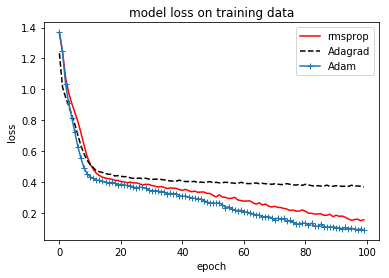

In [43]:
import matplotlib.pyplot as plt
plt.plot(double_history1.history['loss'],'r-')
plt.plot(double_history2.history['loss'],'k--')
plt.plot(double_history3.history['loss'],'+-')
plt.title('model loss on training data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['rmsprop','Adagrad','Adam'], loc=0)
plt.show()

# 三类模型相同迭代下收敛情况比较

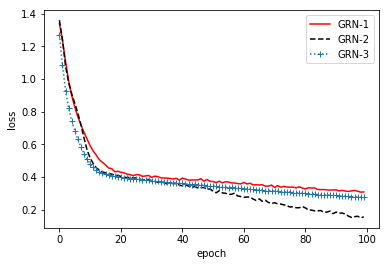

In [47]:
import matplotlib.pyplot as plt
plt.plot(single_history1.history['loss'],'r-')
plt.plot(double_history1.history['loss'],'k--')
plt.plot(bid_history1.history['loss'],'+:')
#plt.title('model loss on training data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['GRN-1','GRN-2','GRN-3'], loc=0)
plt.show()

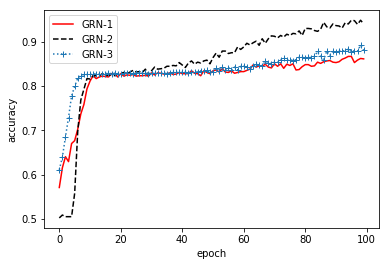

In [48]:
import matplotlib.pyplot as plt
plt.plot(single_history1.history['acc'],'r-')
plt.plot(double_history1.history['acc'],'k--')
plt.plot(bid_history1.history['acc'],'+:')
#plt.title('model loss on training data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['GRN-1','GRN-2','GRN-3'], loc=0)
plt.show()

# 双向GRU

In [4]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

def bidirectional_model_1():
    model = Sequential()
    #use 64d vector to represent each point
    model.add(layers.Bidirectional(
    layers.GRU(32), input_shape=(1,256)))
    model.add(Dense(4, activation='softmax',name = 'output'))
    model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    return model


def bidirectional_model_2():
    model = Sequential()
    #use 64d vector to represent each point
    model.add(layers.Bidirectional(
    layers.GRU(32,), input_shape=(1,256)))
    model.add(Dense(4, activation='softmax',name = 'output'))
    model.compile(loss='categorical_crossentropy',optimizer='Adagrad',metrics=['accuracy'])
    return model

def bidirectional_model_3():
    model = Sequential()
    #use 64d vector to represent each point
    model.add(layers.Bidirectional(
    layers.GRU(32), input_shape=(1,256)))
    model.add(Dense(4, activation='softmax',name = 'output'))
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    return model


bid_model1 = bidirectional_model_1()
bid_model2 = bidirectional_model_2()
bid_model3 = bidirectional_model_3()

bid_model1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 64)                55488     
_________________________________________________________________
output (Dense)               (None, 4)                 260       
Total params: 55,748
Trainable params: 55,748
Non-trainable params: 0
_________________________________________________________________


In [8]:
bid_history1 = bid_model1.fit(X_train, y_train,batch_size=16,epochs=100) 
bid_history2 = bid_model2.fit(X_train, y_train,batch_size=16,epochs=100) 
bid_history3 = bid_model3.fit(X_train, y_train,batch_size=16,epochs=100) 

Epoch 1/100
1080/1080 [==============================] - 2s 2ms/step - loss: 1.2827 - acc: 0.5046
Epoch 2/100
1080/1080 [==============================] - 0s 238us/step - loss: 1.0999 - acc: 0.6130
Epoch 3/100
1080/1080 [==============================] - 0s 237us/step - loss: 0.9441 - acc: 0.6815
Epoch 4/100
1080/1080 [==============================] - 0s 250us/step - loss: 0.8343 - acc: 0.7352
Epoch 5/100
1080/1080 [==============================] - 0s 239us/step - loss: 0.7558 - acc: 0.7722
Epoch 6/100
1080/1080 [==============================] - 0s 257us/step - loss: 0.6957 - acc: 0.7907
Epoch 7/100
1080/1080 [==============================] - 0s 238us/step - loss: 0.6438 - acc: 0.8148
Epoch 8/100
1080/1080 [==============================] - 0s 266us/step - loss: 0.5962 - acc: 0.8231
Epoch 9/100
1080/1080 [==============================] - 0s 253us/step - loss: 0.5534 - acc: 0.8250
Epoch 10/100
1080/1080 [==============================] - 0s 270us/step - loss: 0.5181 - acc: 0.8259
E

1080/1080 [==============================] - 0s 239us/step - loss: 0.3984 - acc: 0.8287
Epoch 63/100
1080/1080 [==============================] - 0s 225us/step - loss: 0.3978 - acc: 0.8287
Epoch 64/100
1080/1080 [==============================] - 0s 227us/step - loss: 0.3973 - acc: 0.8287
Epoch 65/100
1080/1080 [==============================] - 0s 229us/step - loss: 0.3967 - acc: 0.8287
Epoch 66/100
1080/1080 [==============================] - 0s 236us/step - loss: 0.3962 - acc: 0.8287
Epoch 67/100
1080/1080 [==============================] - 0s 237us/step - loss: 0.3958 - acc: 0.8287
Epoch 68/100
1080/1080 [==============================] - 0s 240us/step - loss: 0.3953 - acc: 0.8287
Epoch 69/100
1080/1080 [==============================] - 0s 228us/step - loss: 0.3947 - acc: 0.8287
Epoch 70/100
1080/1080 [==============================] - 0s 225us/step - loss: 0.3943 - acc: 0.8287
Epoch 71/100
1080/1080 [==============================] - 0s 239us/step - loss: 0.3939 - acc: 0.8287
Epo

## optimizer 对GRU-3收敛速度的影响

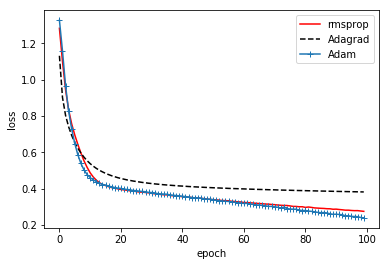

In [10]:
import matplotlib.pyplot as plt
plt.plot(bid_history1.history['loss'],'r-')
plt.plot(bid_history2.history['loss'],'k--')
plt.plot(bid_history3.history['loss'],'+-')
#plt.title('model loss on training data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['rmsprop','Adagrad','Adam'], loc=0)
plt.show()

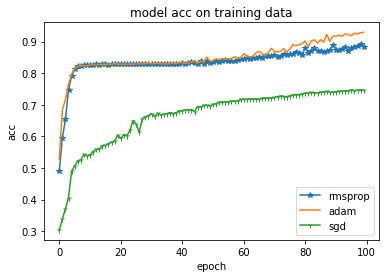

In [57]:
import matplotlib.pyplot as plt
plt.plot(bid_history1.history['acc'],'*-')
plt.plot(bid_history2.history['acc'],'-')
plt.plot(bid_history3.history['acc'],'1-')
plt.title('model acc on training data')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['rmsprop','adam','sgd'], loc=0)
plt.show()

In [22]:
import pydot
import graphviz
from keras.utils import plot_model
plot_model(model1, show_shapes=True,to_file='bidirectional_model.png')

# LSTM

In [12]:
def lstm_model():
    model = Sequential()
    model.add(LSTM(64,input_shape =(1,256),recurrent_dropout=0.3,name = 'lstm1',implementation='1'))
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='softmax',name = 'output'))
    model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    return model

lstm1 = lstm_model()



# CNN

In [10]:
def conv_model():
    model = Sequential()
    model.add(Conv1D(filters=128,kernel_size=2,padding='same',activation='relu',name='conv_layer1',input_shape=(1,256)))
    model.add(Conv1D(filters=64,kernel_size=2,padding='same',activation='relu',name='conv_layer2'))
    model.add(Conv1D(filters=32,kernel_size=2,padding='same',activation='relu',name='conv_layer3'))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu',name = 'fully_connected'))
    model.add(Dense(4, activation='softmax',name = 'output'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

cnn1 = conv_model()

# 模型性能分析--置信度

In [25]:
single_history3 = single_3.fit(X_train, y_train,batch_size=16,epochs=350)
double_history3 = double_3.fit(X_train, y_train,batch_size=16,epochs=350)
bid_history3 = bid_model3.fit(X_train, y_train,batch_size=16,epochs=350)
lstm_history = lstm1.fit(X_train, y_train,batch_size=16,epochs=200)
cnn_history = cnn1.fit(X_train, y_train,batch_size=16,epochs=200)

Text(0,0.5,'probability on each class')

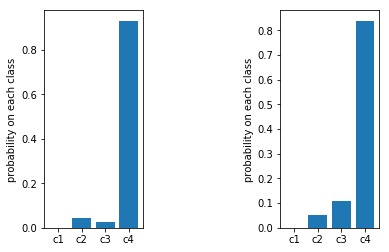

In [153]:
i =35
plt.subplot(1, 3, 1)
coord_x = np.arange(4)
plt.bar(coord_x,c[i])
plt.xticks(coord_x,('c1','c2','c3','c4'))
#plt.title("grn-1 prediction")
plt.ylabel('probability on each class')


plt.subplot(1, 3, 2)
coord_x = np.arange(4)
plt.bar(coord_x,d[i])
plt.xticks(coord_x,('c1','c2','c3','c4'))
#plt.title("grn-2 prediction")
plt.ylabel('probability on each class')



plt.subplot(1, 3, 3)
coord_x = np.arange(4)
plt.bar(coord_x,e[i])
plt.xticks(coord_x,('c1','c2','c3','c4'))
plt.ylabel('probability on each class')
#plt.title("grn-3 prediction")

# 无噪与加噪的对照实验

In [6]:
i = 0
noise_x_test = np.zeros((300,1,256),dtype=np.float64)

for signal in X_test:
    pure_signal = np.squeeze(signal,axis= 0)
    noise = np.random.normal(scale=0.013, size=(256))
    add_noise = pure_signal + noise
    noise_x_test[i] = np.expand_dims(add_noise,axis=0)
    i += 1

In [2]:
bid_model3 = load_model('bid_model3.h5')
double_3 = load_model('double_3.h5')
single_3 = load_model('single_3.h5')
lstm1 = load_model('lstm1.h5')
cnn1 = load_model('cnn1.h5')

In [4]:
a = preformance_analyze(single_3,y_test_index,X_test)
print ('-----------------------------------------')
b = preformance_analyze(double_3,y_test_index,X_test)
print ('-----------------------------------------')
c = preformance_analyze(bid_model3,y_test_index,X_test)
print ('-----------------------------------------')
d = preformance_analyze(lstm1,y_test_index,X_test)
print ('-----------------------------------------')
e = preformance_analyze(cnn1,y_test_index,X_test)

accuracy on 300 testing samples is: 98.33 ,using time:0.025
accuracy of Class 0 is :100.00 
accuracy of Class 1 is :96.51 
accuracy of Class 2 is :97.10 
accuracy of Class 3 is :100.00 
mistake class list [(1, 3), (1, 3), (1, 3), (2, 3), (2, 3)]
-----------------------------------------
accuracy on 300 testing samples is: 96.67 ,using time:0.014
accuracy of Class 0 is :100.00 
accuracy of Class 1 is :94.19 
accuracy of Class 2 is :98.55 
accuracy of Class 3 is :94.44 
mistake class list [(1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (2, 3), (3, 2), (3, 2), (3, 2), (3, 2)]
-----------------------------------------
accuracy on 300 testing samples is: 99.00 ,using time:0.015
accuracy of Class 0 is :100.00 
accuracy of Class 1 is :98.84 
accuracy of Class 2 is :98.55 
accuracy of Class 3 is :98.61 
mistake class list [(1, 3), (2, 3), (3, 1)]
-----------------------------------------
accuracy on 300 testing samples is: 91.33 ,using time:0.014
accuracy of Class 0 is :100.00 
accuracy of Class 1 is

Text(0,0.5,'probability on each class')

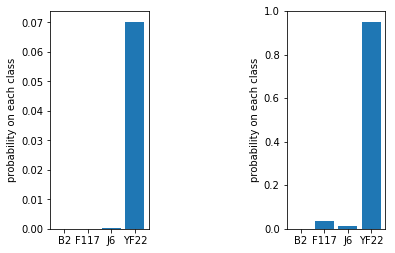

In [19]:
i =35
plt.subplot(1, 3, 1)
coord_x = np.arange(4)
plt.bar(coord_x,b[i])
plt.xticks(coord_x,('B2','F117','J6','YF22'))
#plt.title("grn-1 prediction")
plt.ylabel('probability on each class')


plt.subplot(1, 3, 3)
coord_x = np.arange(4)
plt.bar(coord_x,c[i])
plt.xticks(coord_x,('B2','F117','J6','YF22'))
#plt.title("grn-2 prediction")
plt.ylabel('probability on each class')


Text(0,0.5,'probability on each class')

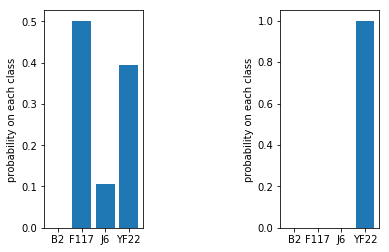

In [20]:
i =35
plt.subplot(1, 3, 1)
coord_x = np.arange(4)
plt.bar(coord_x,d[i])
plt.xticks(coord_x,('B2','F117','J6','YF22'))
#plt.title("grn-1 prediction")
plt.ylabel('probability on each class')


plt.subplot(1, 3, 3)
coord_x = np.arange(4)
plt.bar(coord_x,e[i])
plt.xticks(coord_x,('B2','F117','J6','YF22'))
#plt.title("grn-2 prediction")
plt.ylabel('probability on each class')

# pure signal test

In [21]:
preformance_analyze(single_3,y_test_index,X_test)
print ('-----------------------------------------')
preformance_analyze(double_3,y_test_index,X_test)
print ('-----------------------------------------')
preformance_analyze(bid_model3,y_test_index,X_test)
print ('-----------------------------------------')
preformance_analyze(lstm1,y_test_index,X_test)
print ('-----------------------------------------')
preformance_analyze(cnn1,y_test_index,X_test)

accuracy on 300 testing samples is: 98.33 ,using time:0.024
accuracy of Class 0 is :100.00 
accuracy of Class 1 is :96.51 
accuracy of Class 2 is :97.10 
accuracy of Class 3 is :100.00 
mistake class list [(1, 3), (1, 3), (1, 3), (2, 3), (2, 3)]
-----------------------------------------
accuracy on 300 testing samples is: 96.67 ,using time:0.015
accuracy of Class 0 is :100.00 
accuracy of Class 1 is :94.19 
accuracy of Class 2 is :98.55 
accuracy of Class 3 is :94.44 
mistake class list [(1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (2, 3), (3, 2), (3, 2), (3, 2), (3, 2)]
-----------------------------------------
accuracy on 300 testing samples is: 99.00 ,using time:0.015
accuracy of Class 0 is :100.00 
accuracy of Class 1 is :98.84 
accuracy of Class 2 is :98.55 
accuracy of Class 3 is :98.61 
mistake class list [(1, 3), (2, 3), (3, 1)]
-----------------------------------------
accuracy on 300 testing samples is: 91.33 ,using time:0.015
accuracy of Class 0 is :100.00 
accuracy of Class 1 is

array([[2.7221578e-12, 1.6349781e-05, 9.9208155e-06, 9.9997377e-01],
       [4.3351251e-06, 9.9999571e-01, 2.2233186e-08, 1.3003240e-10],
       [1.0000000e+00, 2.2678383e-18, 2.3438466e-26, 0.0000000e+00],
       ...,
       [3.8599246e-10, 3.7452704e-11, 1.0000000e+00, 1.7587855e-10],
       [1.0000000e+00, 5.4339586e-17, 2.3117741e-25, 0.0000000e+00],
       [5.3135221e-09, 1.0000000e+00, 7.9209642e-12, 4.3305394e-12]],
      dtype=float32)

# noise sigmal test

In [112]:
# 20dB
preformance_analyze(single_3,y_test_index,noise_x_test)
preformance_analyze(double_3,y_test_index,noise_x_test)
preformance_analyze(bid_model3,y_test_index,noise_x_test)
preformance_analyze(lstm1,y_test_index,noise_x_test)
preformance_analyze(cnn1,y_test_index,noise_x_test)
#merge_model_preformance_analyze(double_3,lstm1,y_test_index)

accuracy on 300 testing samples is: 52.33 ,using time:0.051
accuracy of Class 0 is :79.45 
mistake class list [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 2), (1, 2), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 1), (2, 1), (2, 1), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (3, 0), (

array([[1.0000000e+00, 1.4410338e-14, 4.3960003e-20, 0.0000000e+00],
       [3.2032523e-09, 1.0000000e+00, 3.6540148e-14, 9.5643966e-18],
       [9.9999642e-01, 3.5756129e-06, 1.9367893e-12, 1.3815422e-30],
       ...,
       [9.9999940e-01, 6.1133449e-07, 1.1881683e-10, 1.5435931e-28],
       [1.0000000e+00, 2.7450903e-10, 3.6387815e-15, 0.0000000e+00],
       [5.6429960e-02, 9.4357008e-01, 1.3240434e-09, 2.9708055e-18]],
      dtype=float32)

In [19]:
preformance_analyze(single_3,y_test_index)
preformance_analyze(double_3,y_test_index)
preformance_analyze(bid_model3,y_test_index)
preformance_analyze(cnn1,y_test_index)
preformance_analyze(lstm1,y_test_index)

accuracy on 300 testing samples is: 72.00 ,using time:0.081
accuracy of Class 0 is :98.63 
accuracy of Class 1 is :63.95 
accuracy of Class 2 is :68.12 
accuracy of Class 3 is :58.33 
accuracy on 300 testing samples is: 62.33 ,using time:0.035
accuracy of Class 0 is :100.00 
accuracy of Class 1 is :48.84 
accuracy of Class 2 is :47.83 
accuracy of Class 3 is :54.17 
accuracy on 300 testing samples is: 72.67 ,using time:0.026
accuracy of Class 0 is :98.63 
accuracy of Class 1 is :69.77 
accuracy of Class 2 is :63.77 
accuracy of Class 3 is :58.33 
accuracy on 300 testing samples is: 77.67 ,using time:0.020
accuracy of Class 0 is :100.00 
accuracy of Class 1 is :67.44 
accuracy of Class 2 is :81.16 
accuracy of Class 3 is :63.89 
accuracy on 300 testing samples is: 73.33 ,using time:0.022
accuracy of Class 0 is :97.26 
accuracy of Class 1 is :69.77 
accuracy of Class 2 is :59.42 
accuracy of Class 3 is :66.67 


array([[4.9506114e-03, 2.0188013e-02, 9.7358602e-01, 1.2754299e-03],
       [9.3344785e-12, 2.3062218e-02, 1.9728136e-15, 9.7693777e-01],
       [1.0000000e+00, 3.2448767e-13, 5.9333050e-17, 4.0192202e-20],
       ...,
       [2.3434258e-07, 1.3284199e-01, 1.4642191e-01, 7.2073585e-01],
       [1.0000000e+00, 4.3195932e-08, 1.9896049e-20, 1.8259550e-17],
       [9.9524409e-01, 4.7559491e-03, 5.8425334e-15, 2.1575495e-12]],
      dtype=float32)

In [90]:
# 10dB
preformance_analyze(single_3,y_test_index)
preformance_analyze(double_3,y_test_index)
preformance_analyze(bid_model3,y_test_index)
preformance_analyze(cnn1,y_test_index)
preformance_analyze(lstm1,y_test_index)
merge_model_preformance_analyze(double_3,lstm1,y_test_index)

accuracy on 300 testing samples is: 98.33 ,using time:0.030
accuracy of Class 0 is :100.00 
accuracy of Class 1 is :96.51 
accuracy of Class 2 is :97.10 
accuracy of Class 3 is :100.00 
accuracy on 300 testing samples is: 96.67 ,using time:0.018
accuracy of Class 0 is :100.00 
accuracy of Class 1 is :94.19 
accuracy of Class 2 is :98.55 
accuracy of Class 3 is :94.44 
accuracy on 300 testing samples is: 99.00 ,using time:0.019
accuracy of Class 0 is :100.00 
accuracy of Class 1 is :98.84 
accuracy of Class 2 is :98.55 
accuracy of Class 3 is :98.61 
accuracy on 300 testing samples is: 97.67 ,using time:0.016
accuracy of Class 0 is :100.00 
accuracy of Class 1 is :96.51 
accuracy of Class 2 is :100.00 
accuracy of Class 3 is :94.44 
accuracy on 300 testing samples is: 91.33 ,using time:0.021
accuracy of Class 0 is :100.00 
accuracy of Class 1 is :83.72 
accuracy of Class 2 is :92.75 
accuracy of Class 3 is :90.28 
accuracy on 300 testing samples is: 92.00 ,using time:0.034
accuracy of C

array([[9.9629842e-06, 1.4760172e-01, 6.1773412e-02, 4.3259078e-01],
       [1.6903089e-06, 3.6901584e-01, 2.4262359e-10, 1.3141969e-01],
       [9.8869419e-01, 5.5671979e-05, 2.9094251e-08, 2.7493691e-12],
       ...,
       [1.8713943e-06, 8.3394808e-04, 9.9887276e-01, 2.9072474e-04],
       [9.9372369e-01, 7.2828356e-05, 1.1299480e-08, 4.2494042e-15],
       [6.5136909e-08, 5.0645739e-01, 1.3372852e-09, 1.0496576e-07]],
      dtype=float32)

## LSTM GRU融合模型

In [80]:
from keras.models import Sequential
from keras import layers

top1_model = Sequential()
top1_model.add(layers.Bidirectional(layers.GRU(32), input_shape=(1,256)))

top2_model = Sequential()
top2_model.add(LSTM(64,input_shape =(1,256),recurrent_dropout=0.3,name = 'lstm1',implementation='1'))


merged = layers.Merge([top1_model,top2_model])
merge_model = Sequential()
merge_model.add(merged)
merge_model.add(Dense(4, activation='softmax',name = 'output'))
merge_model.summary()
merge_model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_12 (Merge)             (None, 64)                0         
_________________________________________________________________
output (Dense)               (None, 4)                 260       
Total params: 137,924
Trainable params: 137,924
Non-trainable params: 0
_________________________________________________________________


C:\Users\yuchen\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  # This is added back by InteractiveShellApp.init_path()


In [81]:
merge_model.fit([X_train,X_train], y_train,batch_size=16,epochs=400)

Epoch 1/400
900/900 [==============================] - 4s 4ms/step - loss: 1.3204 - acc: 0.4978
Epoch 2/400
900/900 [==============================] - 1s 638us/step - loss: 1.1226 - acc: 0.6589
Epoch 3/400
900/900 [==============================] - 1s 587us/step - loss: 0.9314 - acc: 0.6744
Epoch 4/400
900/900 [==============================] - 0s 447us/step - loss: 0.8064 - acc: 0.7400
Epoch 5/400
900/900 [==============================] - 0s 467us/step - loss: 0.7204 - acc: 0.7944
Epoch 6/400
900/900 [==============================] - 1s 560us/step - loss: 0.6477 - acc: 0.8122
Epoch 7/400
900/900 [==============================] - 1s 633us/step - loss: 0.5875 - acc: 0.8211
Epoch 8/400
900/900 [==============================] - 1s 610us/step - loss: 0.5394 - acc: 0.8211
Epoch 9/400
900/900 [==============================] - 1s 567us/step - loss: 0.5029 - acc: 0.8222
Epoch 10/400
900/900 [==============================] - 1s 609us/step - loss: 0.4763 - acc: 0.8244
Epoch 11/400
900/900 

900/900 [==============================] - 0s 460us/step - loss: 0.0789 - acc: 0.9844
Epoch 166/400
900/900 [==============================] - 0s 464us/step - loss: 0.0782 - acc: 0.9833
Epoch 167/400
900/900 [==============================] - 0s 458us/step - loss: 0.0780 - acc: 0.9833
Epoch 168/400
900/900 [==============================] - 0s 448us/step - loss: 0.0777 - acc: 0.9800
Epoch 169/400
900/900 [==============================] - 0s 483us/step - loss: 0.0749 - acc: 0.9822
Epoch 170/400
900/900 [==============================] - 0s 454us/step - loss: 0.0770 - acc: 0.9822
Epoch 171/400
900/900 [==============================] - 0s 452us/step - loss: 0.0758 - acc: 0.9800
Epoch 172/400
900/900 [==============================] - 0s 493us/step - loss: 0.0752 - acc: 0.9844
Epoch 173/400
900/900 [==============================] - 0s 457us/step - loss: 0.0747 - acc: 0.9833
Epoch 174/400
900/900 [==============================] - 0s 464us/step - loss: 0.0722 - acc: 0.9833
Epoch 175/400


900/900 [==============================] - 0s 482us/step - loss: 0.0398 - acc: 0.9878
Epoch 248/400
900/900 [==============================] - 0s 472us/step - loss: 0.0387 - acc: 0.9922
Epoch 249/400
900/900 [==============================] - 1s 563us/step - loss: 0.0396 - acc: 0.9878
Epoch 250/400
900/900 [==============================] - 0s 506us/step - loss: 0.0395 - acc: 0.9856
Epoch 251/400
900/900 [==============================] - 0s 518us/step - loss: 0.0419 - acc: 0.9911
Epoch 252/400
900/900 [==============================] - 0s 483us/step - loss: 0.0394 - acc: 0.9878
Epoch 253/400
900/900 [==============================] - 0s 474us/step - loss: 0.0402 - acc: 0.9878
Epoch 254/400
900/900 [==============================] - 0s 504us/step - loss: 0.0364 - acc: 0.9889
Epoch 255/400
900/900 [==============================] - 0s 498us/step - loss: 0.0376 - acc: 0.9922
Epoch 256/400
900/900 [==============================] - 0s 481us/step - loss: 0.0377 - acc: 0.9856
Epoch 257/400


900/900 [==============================] - 0s 454us/step - loss: 0.0259 - acc: 0.9922
Epoch 330/400
900/900 [==============================] - 0s 478us/step - loss: 0.0213 - acc: 0.9933
Epoch 331/400
900/900 [==============================] - 0s 457us/step - loss: 0.0225 - acc: 0.9944
Epoch 332/400
900/900 [==============================] - 0s 452us/step - loss: 0.0240 - acc: 0.9922
Epoch 333/400
900/900 [==============================] - 0s 478us/step - loss: 0.0220 - acc: 0.9944
Epoch 334/400
900/900 [==============================] - 0s 447us/step - loss: 0.0246 - acc: 0.9911
Epoch 335/400
900/900 [==============================] - 0s 442us/step - loss: 0.0237 - acc: 0.9944
Epoch 336/400
900/900 [==============================] - 0s 489us/step - loss: 0.0232 - acc: 0.9933
Epoch 337/400
900/900 [==============================] - 0s 457us/step - loss: 0.0229 - acc: 0.9911
Epoch 338/400
900/900 [==============================] - 0s 453us/step - loss: 0.0233 - acc: 0.9933
Epoch 339/400
